In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
data_warm = pd.read_excel('ClimateChange.xlsx', tablename='Data')
data_gt = pd.read_excel('GlobalTemperature.xlsx')

In [3]:
co2e = data_warm[data_warm['Series code']=='EN.ATM.CO2E.KT'].replace({'..':np.nan})
meth = data_warm[data_warm['Series code']=='EN.ATM.METH.KT.CE'].replace({'..':np.nan})
noxe = data_warm[data_warm['Series code']=='EN.ATM.NOXE.KT.CE'].replace({'..':np.nan})
ghgo = data_warm[data_warm['Series code']=='EN.ATM.GHGO.KT.CE'].replace({'..':np.nan})
ghgr = data_warm[data_warm['Series code']=='EN.CLC.GHGR.MT.CE'].replace({'..':np.nan})

co2e_fn = co2e.loc[6:].fillna(method='ffill',axis=1).fillna(method='bfill',axis=1)
meth_fn = meth.loc[6:].fillna(method='ffill',axis=1).fillna(method='bfill',axis=1)
noxe_fn = noxe.loc[6:].fillna(method='ffill',axis=1).fillna(method='bfill',axis=1)
ghgo_fn = ghgo.loc[6:].fillna(method='ffill',axis=1).fillna(method='bfill',axis=1)
ghgr_fn = ghgr.loc[6:].fillna(method='ffill',axis=1).fillna(method='bfill',axis=1)

In [4]:
# lines in 1990 to 2010:
# 1. total emissions of warm sphere per year
# 2. average temperature in land per year
# 3. average temperature in land and sea per year
emi_sum = pd.concat([co2e_fn,meth_fn,noxe_fn,ghgo_fn,ghgr_fn])
emi_years = emi_sum[emi_sum.columns[6:]].apply(lambda x:x.sum())
# emi_years' keys is not datetime object, so make years, and Series() them again
years = pd.to_datetime(emi_sum[emi_sum.columns[6:]].keys(),format='%Y')
emi_series = pd.Series(list(emi_years), index=years)['1990':'2010']
emi_max = emi_series.max()
emi_min = emi_series.min()
# emi's index will be look like 1990-01-01, dont worry, its truly in full year
emi = emi_series.apply(lambda x:(x - emi_min)/(emi_max - emi_min))

In [5]:
data_gt['Date'] = data_gt['Date'].apply(lambda x: pd.to_datetime(x))
data_gt = data_gt.set_index('Date')
data_gt_year = data_gt['1990':'2010'].resample('A').sum().fillna(0)

gt_lat = data_gt_year['Land Average Temperature']
gt_lat_max = gt_lat.max()
gt_lat_min = gt_lat.min()
gt_lat = gt_lat.apply(lambda x: (x - gt_lat_min)/(gt_lat_max - gt_lat_min))
gt_laoat = data_gt_year['Land And Ocean Average Temperature']
gt_laoat_max = gt_laoat.max()
gt_laoat_min = gt_laoat.min()
gt_laoat = gt_laoat.apply(lambda x: (x - gt_laoat_min)/(gt_laoat_max - gt_laoat_min))

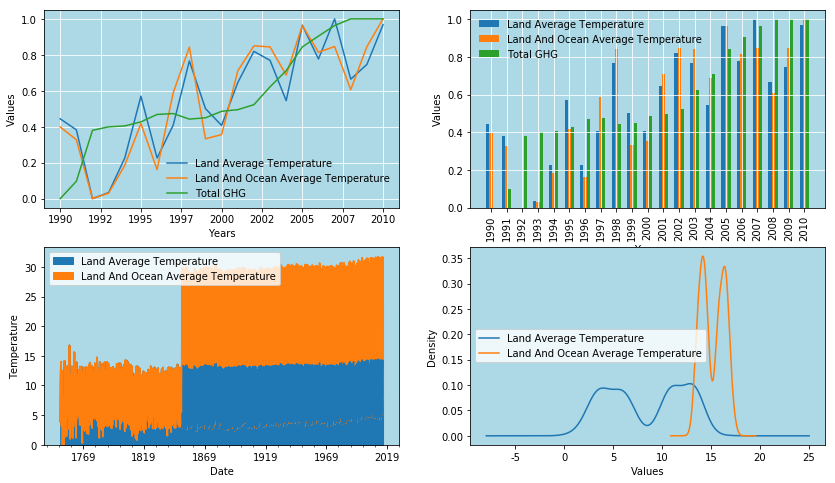

In [7]:
fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(2,2,1)
ax1.set_xlabel('Years')
ax1.set_ylabel('Values')
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax1.set_facecolor('lightblue')
ax1.grid(color='w')
ax1.plot(data_gt_year.index.year, gt_lat, label='Land Average Temperature')
ax1.plot(data_gt_year.index.year, gt_laoat, label='Land And Ocean Average Temperature')
ax1.plot(emi.keys().year, emi, label='Total GHG')
ax1.legend(loc=4, framealpha=0.0)

ax2 = fig.add_subplot(2,2,2)
ax2.set_xlabel('Years')
ax2.set_ylabel('Values')
ax2.set_facecolor('lightblue')
ax2.set_xticks(data_gt_year.index.year)
ax2.set_xticklabels(data_gt_year.index.year, rotation='vertical')
ax2.grid(color='w')
ax2.bar(data_gt_year.index.year-0.2, gt_lat, 0.2, label='Land Average Temperature')
ax2.bar(data_gt_year.index.year, gt_laoat, 0.2, label='Land And Ocean Average Temperature')
ax2.bar(emi.keys().year+0.2, emi, 0.2, label='Total GHG')
ax2.legend(loc=2, framealpha=0.0)

area_data = data_gt.resample('Q').mean()
area_data_x = area_data.index
area_l = area_data['Land Average Temperature']
area_lo = area_data['Land And Ocean Average Temperature']
area_data_plot = area_data.loc[:,['Land Average Temperature','Land And Ocean Average Temperature']]
ax3 = fig.add_subplot(2,2,3)
ax3.set_xlabel('Quarters')
ax3.set_ylabel('Temperature')
ax3.set_facecolor('lightblue')
ax3.grid(color='w')
# ax3.legend(loc=2, framealpha=0.0)
area_data_plot.plot.area(ax=ax3)

ax4 = fig.add_subplot(2,2,4)
ax4.set_xlabel('Values')
ax4.set_ylabel('Values')
ax4.set_facecolor('lightblue')
ax4.grid(color='w')
# ax4.legend(loc=1, framealpha=0.0)
area_data_plot.plot.kde(ax=ax4)

plt.show()

In [8]:
import sklearn